Your client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:

They first identify a set of employees based on recommendations/ past performance
Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical
At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., employee gets promotion
For above mentioned process, the final promotions are only announced after the evaluation and this leads to delay in transition to their new roles. Hence, company needs your help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle. 

They have provided multiple attributes around Employee's past and current performance along with demographics. Now, The task is to predict whether a potential promotee at checkpoint in the test set will be promoted or not after the evaluation process.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the data sets

In [2]:
train_data=pd.read_csv('train_LZdllcl.csv')
test_data=pd.read_csv('test_2umaH9m.csv')

# Checking th basic details of dataset.

In [3]:
train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
test_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [5]:
train_data.shape

(54808, 14)

In [6]:
test_data.shape

(23490, 13)

In [7]:
train_data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [8]:
test_data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

In [9]:
train_data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [10]:
test_data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.358834,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.479668,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [12]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [13]:
#copying data before preprocessing.
copy_train=train_data.copy()
copy_test=test_data.copy()

In [14]:
train_data['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

# Data Preprocessing

## Train dataset

### Checking for the null values in dataset:

In [15]:
train_data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

### Treating the missing values:-

<AxesSubplot:>

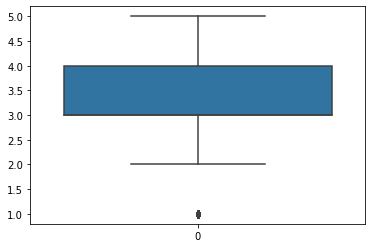

In [16]:
#edcuation filled with forward fill
train_data["education"] = train_data["education"].ffill(axis = 0)

#Checking for outliers in rating column
sns.boxplot(data=train_data['previous_year_rating'])

Hence,we can replace those null values with mean.


In [17]:
#Replacing null values with 0 rating
train_data[ "previous_year_rating"] = train_data["previous_year_rating"].fillna(0)

In [18]:
train_data.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

Null values are handled in train data.

## Test data set

In [19]:
test_data.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

<AxesSubplot:>

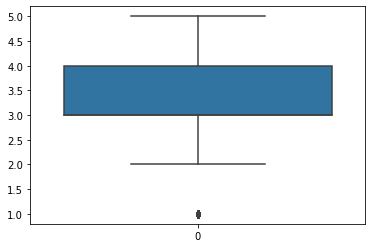

In [20]:
#edcuation filled with forward fill
test_data["education"] = test_data["education"].ffill(axis = 0)

#Checking for outliers in rating column
sns.boxplot(data=test_data['previous_year_rating'])

In [21]:
#Replacing null values with 0 rating
test_data['previous_year_rating']=test_data['previous_year_rating'].fillna(0)

In [22]:
test_data.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

Null values in the test data are handled.

# Feature engineering and feature reduction.

In [23]:
#Checking for duplicate data
train_data.duplicated().sum()

0

In [24]:
#Checking for duplicate data
test_data.duplicated().sum()

0

In [25]:
train_data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [26]:
# lets create some extra features from existing features to improve our Model

# creating a Metric of Sum
train_data['sum_metric'] = train_data['awards_won?']+train_data['KPIs_met >80%'] + train_data['previous_year_rating']
test_data['sum_metric'] = test_data['awards_won?']+test_data['KPIs_met >80%'] + test_data['previous_year_rating']


# creating a total score column
train_data['total_score'] = train_data['avg_training_score'] * train_data['no_of_trainings']
test_data['total_score'] = test_data['avg_training_score'] * test_data['no_of_trainings']
train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,6.0,49
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,5.0,60
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,3.0,50
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,1.0,100
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,3.0,73


In [27]:
#Here region and recruitment channel doesnot contribute much to the promotion,hence dropping those features.
# also the employee id is not useful so lets remove it.

train_data = train_data.drop(['recruitment_channel', 'region', 'employee_id'], axis = 1)
test_data = test_data.drop(['recruitment_channel', 'region','employee_id'], axis = 1)
train_data.shape

(54808, 13)

In [28]:
#checking for promoted persons who didnot receive award,not scored KPI above 80,previous rating as 1 and avg training score less than 60

train_data[(train_data['KPIs_met >80%'] == 0) & (train_data['previous_year_rating'] == 1.0) & 
      (train_data['awards_won?'] == 0) & (train_data['avg_training_score'] < 60) & (train_data['is_promoted'] == 1)]

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
31860,Sales & Marketing,Bachelor's,m,1,27,1.0,2,0,0,58,1,1.0,58
51374,Sales & Marketing,Bachelor's,m,1,31,1.0,5,0,0,58,1,1.0,58


In [29]:
#Let us drop these 2 rows which is not a significant data
train_data=train_data.drop(train_data[(train_data['KPIs_met >80%']==0)&(train_data['previous_year_rating']==1)&(train_data['awards_won?'] == 0)&
                                     (train_data['avg_training_score'] < 60) & (train_data['is_promoted'] == 1)].index)

train_data.shape

(54806, 13)

<AxesSubplot:>

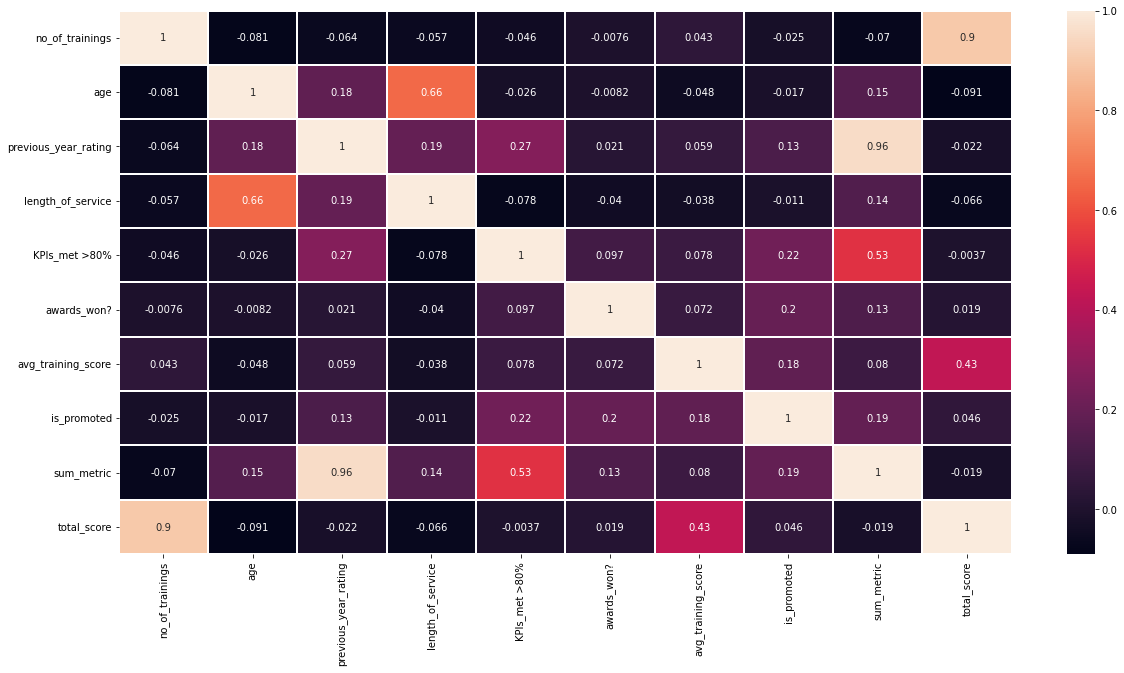

In [30]:
corr_matrix1=train_data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix1,annot=True,linewidth=0.2)

<AxesSubplot:>

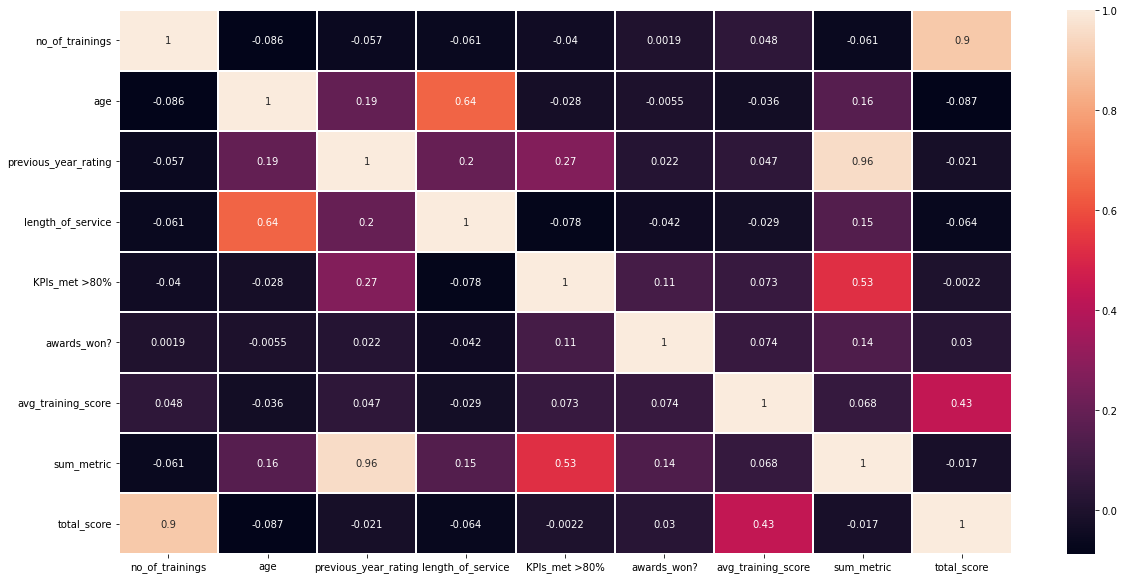

In [31]:
corr_matrix2=test_data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix2,annot=True,linewidth=0.2)

The total score and no.of trainings shows a correlation of 0.9,we can drop no.of trainings.
The sum_metric and previous year rating shows a correlation of 0.96,we can drop previous year ratings.

In [32]:
train_data=train_data.drop(['no_of_trainings','previous_year_rating'],axis=1)
test_data=test_data.drop(['no_of_trainings','previous_year_rating'],axis=1)


In [33]:
train_data.shape

(54806, 11)

In [34]:
test_data.shape

(23490, 10)

In [35]:
# Based on Age Distribution - Most of the Employees are in range 20-40 who will be also waiting for a Promotion
# so we have created 2 Bins 20-29, 29-39 and remaining 1 Bin for 39-49.
# displot -> plot a univariate(Single Feature) distribution of observations.
train_data['age'] = pd.cut( x=train_data['age'], bins=[19, 29, 39, 49,60], labels=['20', '30', '40','50'] )
test_data['age'] = pd.cut( x=test_data['age'], bins=[19, 29, 39, 49,60],  labels=['20', '30', '40','50'] )

# Encoding

In [36]:
#Label encoding the categorical columns.
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train_data['department']=le.fit_transform(train_data['department'])
train_data['education']=le.fit_transform(train_data['education'])
train_data['gender']=le.fit_transform(train_data['gender'])

#for test data
test_data['department']=le.fit_transform(test_data['department'])
test_data['education']=le.fit_transform(test_data['education'])
test_data['gender']=le.fit_transform(test_data['gender'])

In [37]:
train_data.isna().sum()

department            0
education             0
gender                0
age                   0
length_of_service     0
KPIs_met >80%         0
awards_won?           0
avg_training_score    0
is_promoted           0
sum_metric            0
total_score           0
dtype: int64

# Exploratory Data Analysis.

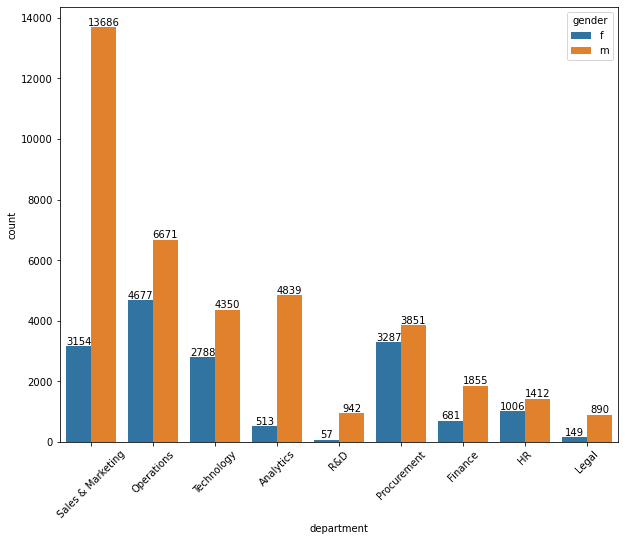

In [38]:
#plot of different departments for promotion
plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
fig1=sns.countplot(data=copy_train,x='department',hue='gender')
for i in fig1.containers:
    fig1.bar_label(i)

The plot shows that more than 10k no. of employess for promtion belongs to Sales & marketing department and Operations, most of them are males.

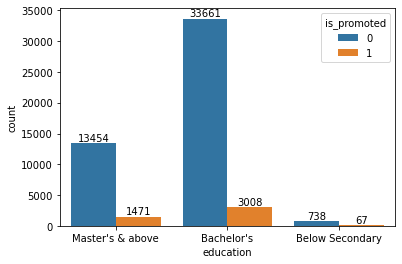

In [39]:
fig2=sns.countplot(data=copy_train,x='education',hue='is_promoted')
for i in fig2.containers:
    fig2.bar_label(i)

The train data as of now shows that ,Master education doesnot contribute much to the factor of promotion.

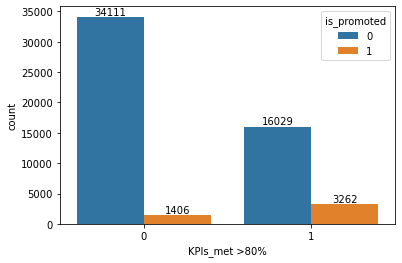

In [40]:
fig3=sns.countplot(data=copy_train,x='KPIs_met >80%',hue='is_promoted')
for i in fig3.containers:
    fig3.bar_label(i)

The KPI score is a decision factor of promotion.

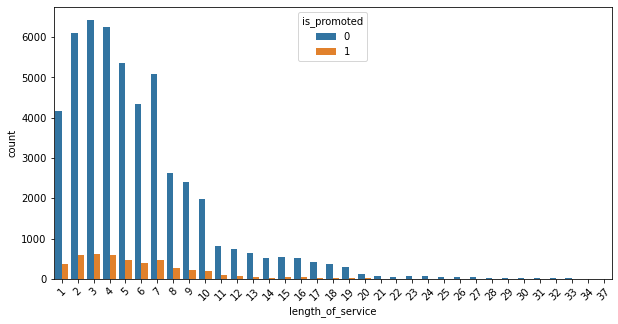

In [41]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
fig4=sns.countplot(data=copy_train,x='length_of_service',hue='is_promoted')
for i in fig4.containers:
    fig3.bar_label(i)

It is evident that promotion is not based on length of service.

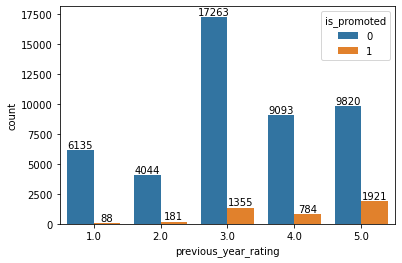

In [42]:
fig5=sns.countplot(data=copy_train,x='previous_year_rating',hue='is_promoted')
for i in fig5.containers:
    fig5.bar_label(i)

The plot shows rating 3 and above are considered mostly for the promotion.

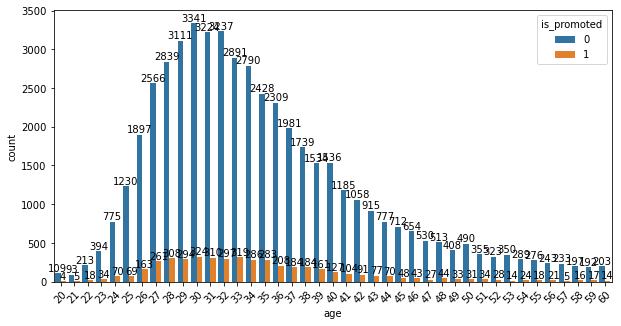

In [43]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
fig6=sns.countplot(data=copy_train,x='age',hue='is_promoted')
for i in fig6.containers:
    fig6.bar_label(i)

The age range considered mostly 27-40 for promotion.

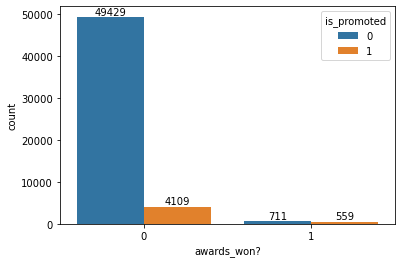

In [44]:
fig7=sns.countplot(data=copy_train,x='awards_won?',hue='is_promoted')
for i in fig7.containers:
    fig7.bar_label(i)

C:\Users\ollak\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

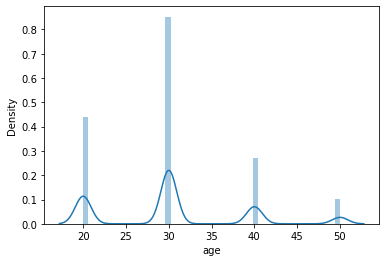

In [45]:
sns.distplot(train_data['age'])

## Splitting the data

In [46]:
x=train_data.drop(['is_promoted'],axis=1)
y=train_data['is_promoted']

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [48]:
x_test_final=test_data

## Feature Scaling

In [49]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x=pd.DataFrame(x)
x_test_final=scaler.transform(x_test_final)

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [50]:
#Fitting with different models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB


In [51]:
models={'RandomForestClassifier':RandomForestClassifier(),
        'LogisticRegression':LogisticRegression(),
        'KNeighborsClassifier':KNeighborsClassifier(),
        'SVC':SVC(),
        'DecisionTreeClassifier':DecisionTreeClassifier(),
        'BernoulliNB':BernoulliNB(),
       }

for name,model in models.items():
    model.fit(x_train,y_train)
    print(name+' trained')

RandomForestClassifier trained
LogisticRegression trained
KNeighborsClassifier trained
SVC trained
DecisionTreeClassifier trained
BernoulliNB trained


In [52]:
from sklearn.metrics import f1_score,accuracy_score
model_test_f1_score=[]
model_test_accuracy_score=[]
#checking the scores of classifiers
for name,model in models.items():
    y_pred=model.predict(x_test)
    model_test_f1_score.append(f1_score(y_test,y_pred,average='weighted'))
    model_test_accuracy_score.append(accuracy_score(y_test,y_pred))

In [53]:
Models = ['Random Forest','Logistic regression','KNN','SVM','DecisionTree','BernolliNB']
model_performance = pd.DataFrame({
    'Model':Models,
    'F1_score':model_test_f1_score,
    'Accuracy_Score':model_test_accuracy_score
    })
model_performance

,Model,F1_score,Accuracy_Score
0,Random Forest,0.915091,0.924193
1,Logistic regression,0.883706,0.916439
2,KNN,0.903921,0.922368
3,SVM,0.893394,0.922277
4,DecisionTree,0.905850,0.908502
5,BernolliNB,0.885866,0.914067


In [58]:
#Considering the Random Forest Classifier for test data promotion prediction,
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
model=rf.fit(x_train,y_train)
y_test_pred=model.predict(x_test_final)

In [59]:
# Create a Dataframe Table for Submission Purpose :
Result_Promoted = pd.DataFrame({'employee_id': copy_test["employee_id"], 'is_promoted' : y_test_pred})

In [60]:
Result_Promoted['is_promoted'].value_counts()

0    22366
1     1124
Name: is_promoted, dtype: int64

In [61]:
Result_Promoted.to_csv("result.csv",index=False)